In [12]:
%matplotlib inline
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist

with open('../10k_CAFFE_samples/topic_probs.json') as fd:
    caffe_feats = np.array(json.loads(fd.read())['topic_probs'])

pytorch_feats = np.genfromtxt('../10k_PYTORCH_samples/outputVector.npy', delimiter=';')

In [11]:
# Let's look at the variance.
print('CAFFE (var): \n', caffe_feats.var(0))
print('TORCH (var): \n', pytorch_feats.var(0))


CAFFE (var): 
 [2.71499850e-05 9.80993863e-04 6.83163098e-03 9.71594311e-03
 4.07766686e-03 3.02935532e-03 3.77440212e-03 7.47083643e-03
 5.78806875e-04 1.06806783e-02 1.77314464e-03 8.45573934e-03
 7.12833031e-05 6.34822423e-03 4.31869103e-03 7.08524097e-06
 9.67658431e-05 2.64739801e-04 4.08644804e-04 5.40126747e-04
 5.46604369e-03 1.55803709e-03 3.49635754e-03 1.84514120e-03
 3.54975143e-03 1.68132611e-02 8.52440900e-03 4.70094772e-03
 1.02188933e-02 2.17177622e-02 3.59544792e-03 5.52681592e-05
 3.00116890e-03 8.02579845e-03 1.91933211e-02 6.90776521e-03
 4.81782761e-03 4.38888264e-03 1.54697576e-02 4.81780713e-03]
TORCH (var): 
 [4.42642246e-09 2.58824271e-09 2.57139748e-09 1.34767000e-09
 1.24866844e-09 2.59269087e-09 1.09181266e-09 8.54756975e-10
 4.44946194e-09 6.95621796e-10 4.78997810e-10 1.19018401e-09
 1.17990975e-09 1.88462005e-09 7.21751686e-09 3.81762103e-09
 9.13527369e-09 1.22575990e-09 4.50090668e-09 5.07745979e-10
 2.54721913e-09 1.83752295e-09 3.59983671e-10 2.553263

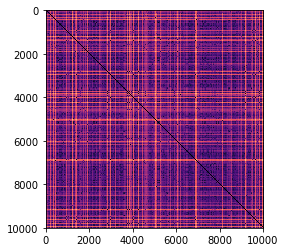

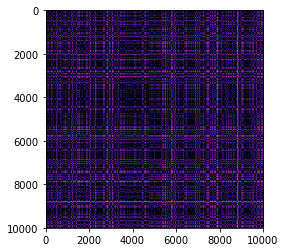

In [30]:
# And lets look at all pairs of Euclidean distances. From the results
# of this, we see that the distances between pairs is on average MUCH
# smaller in the pytorch embeddings...

Dc = squareform(pdist(caffe_feats))
Dp = squareform(pdist(pytorch_feats))
cmap = plt.get_cmap('magma')
plt.imshow(Dc, cmap=cmap); plt.show()
plt.imshow(Dp, cmap=cmap); plt.show()

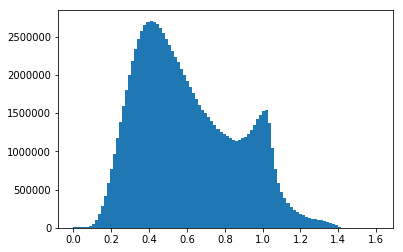

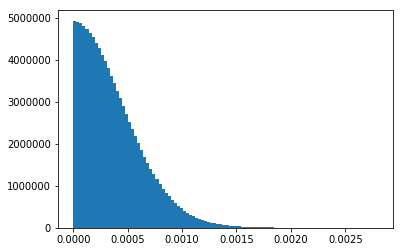

In [28]:
# Now lets look at histograms of all of the distance pairs. From these
# histograms it seems like the pytorch embeddings are extremely degenerate.
_ = plt.hist(Dc.flatten(), bins=100); plt.show()
_ = plt.hist(Dp.flatten(), bins=100); plt.show()

In [31]:
# OK, lets do some PCA analysis now.
from sklearn.decomposition import PCA
pytorch_PCA = PCA().fit(pytorch_feats)
caffe_PCA = PCA().fit(caffe_feats)

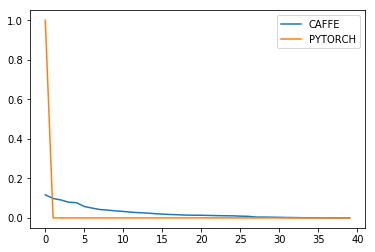

In [41]:
# So, there is only ONE significant dimension of variation in the PYTORCH
# embedding. They seem to be collapsing in some way.
plt.plot(caffe_PCA.explained_variance_ratio_, label='CAFFE')
plt.plot(pytorch_PCA.explained_variance_ratio_, label='PYTORCH')
plt.legend(['CAFFE', 'PYTORCH'])